In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import subprocess

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

import matplotlib
from matplotlib import rc
font = {'size'   : 8}
matplotlib.rc('font', **font)

# change font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Part 1: Read in data

In [2]:
# read in predictions from model on Broad800K SMILES
df = pd.read_csv('../out/broad800k_model_predictions_08_20_2021.csv') 
scos = list(df['hit_inh'])

# get the list of inhibition and killing scores without any NaNs
clean_inh = []
clean_kill = []
for sco in list(df['hit_inh']):
    try: 
        clean_inh.append(float(sco))
    except:
        continue
for sco in list(df['hit_kill']):
    try: 
        clean_kill.append(float(sco))
    except:
        continue

# relevant data for inhibition
df= pd.DataFrame(clean_inh, columns = ['scores'])
df = df.sort_values(by = 'scores', ascending = False)
df['rank'] = range(0,len(df))
inhscos = list(df['scores'])
inhrank = list(df['rank'])

# relevant data for killing
df= pd.DataFrame(clean_kill, columns = ['scores'])
df = df.sort_values(by = 'scores', ascending = False)
df['rank'] = range(0,len(df))
killscos = list(df['scores'])
killrank = list(df['rank'])

# Part 2: Make plots

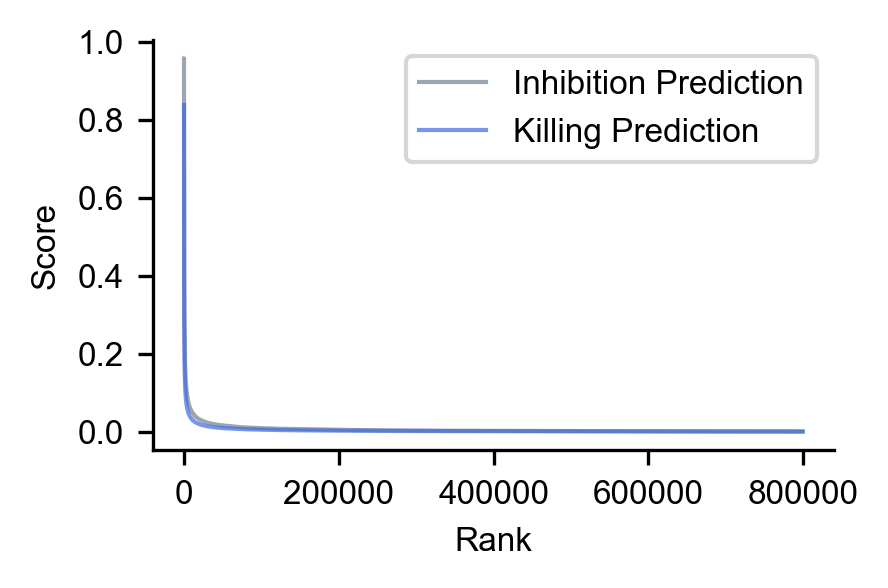

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_79810/1083694441.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


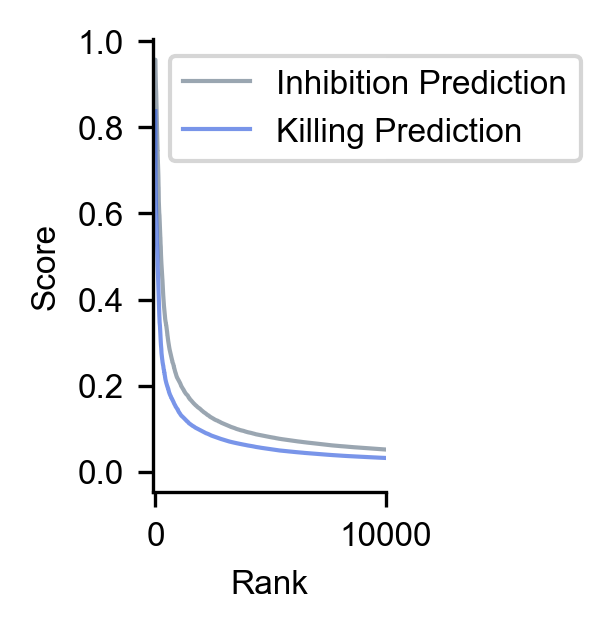

In [3]:
# make publication quality plot for inhibition and killing predictions
fig, ax = plt.subplots(figsize = (3,2), dpi = 300)
plt.plot(inhrank, inhscos, linestyle = '-', alpha = 0.7, fillstyle = 'full', markersize=1, linewidth = 1, color = 'slategrey', label = 'Inhibition Prediction')
plt.plot(killrank, killscos, linestyle = '-', alpha = 0.7, fillstyle = 'full', markersize=1, linewidth = 1, color = 'royalblue', label = 'Killing Prediction')
plt.xlabel('Rank')
plt.ylabel('Score')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.tight_layout()
plt.savefig('../figure_panels/S2B_prediction_scores_full.png')
plt.show()

# plot zoomed in version for inset
fig, ax = plt.subplots(figsize = (1,2), dpi = 300)
plt.plot(inhrank, inhscos, linestyle = '-', alpha = 0.7, fillstyle = 'full', markersize=1, linewidth = 1, color = 'slategrey', label = 'Inhibition Prediction')
plt.plot(killrank, killscos, linestyle = '-', alpha = 0.7, fillstyle = 'full', markersize=1, linewidth = 1, color = 'royalblue', label = 'Killing Prediction')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xlim([-100,10000])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.tight_layout()
plt.savefig('../figure_panels/S2B_prediction_scores_zoom.png')
plt.show()